<a href="https://colab.research.google.com/github/ggwnsghgg/FastCampus/blob/main/2021_2_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [2]:
from sklearn.datasets import load_boston

데이터 로드

In [3]:
data = load_boston()

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

train / test 데이터를 분할 합니다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55


In [12]:
y_train.head()

259    30.1
251    24.8
235    24.0
424    11.7
109    19.4
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [13]:
import numpy as np

In [14]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [15]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [16]:
my_mse(pred, actual)

4.0

In [17]:
 def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [18]:
my_mae(pred, actual)

2.0

In [19]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [20]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [23]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(n_jobs=1)

* n_jobs: CPU코어의 사용

In [27]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
pred = model.predict(x_test)

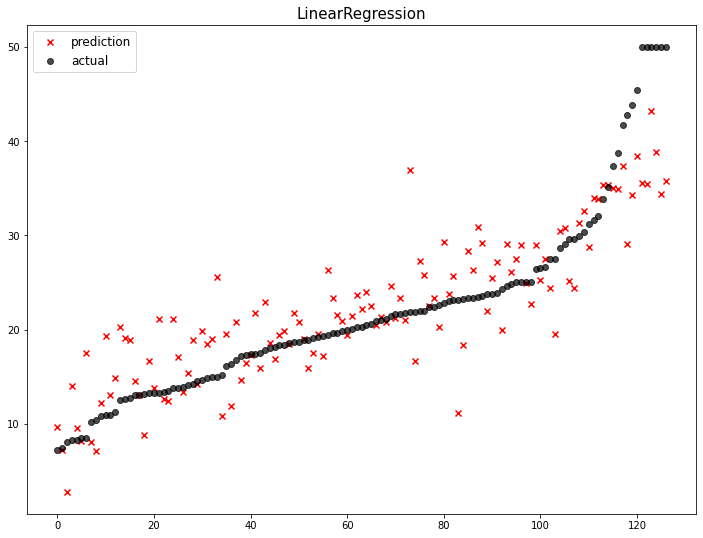

              model        mse
0  LinearRegression  26.035559


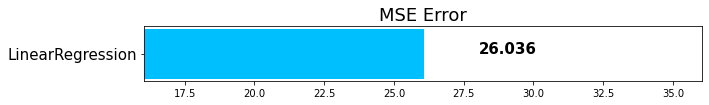

In [29]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [30]:
from sklearn.linear_model import Ridge

In [31]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

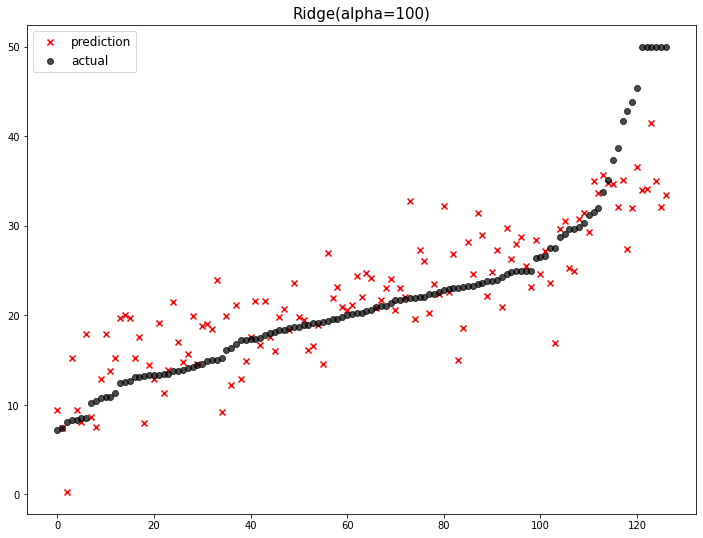

              model        mse
0  Ridge(alpha=100)  30.304403
1  LinearRegression  26.035559


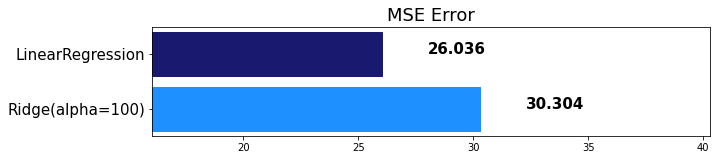

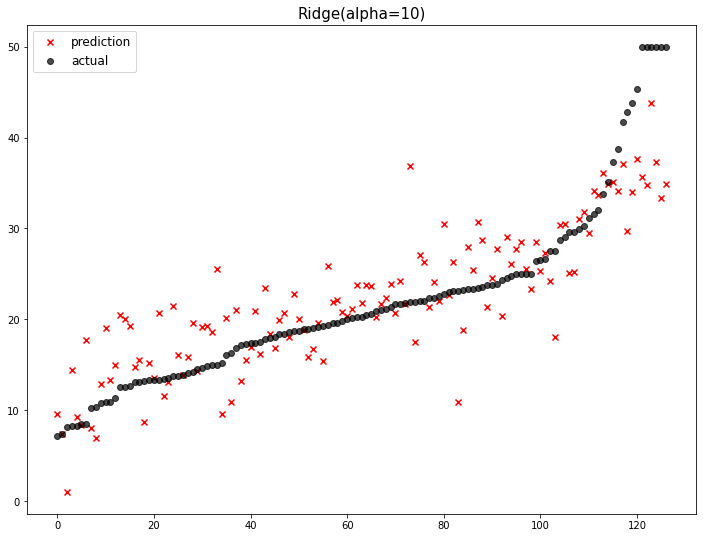

              model        mse
0  Ridge(alpha=100)  30.304403
1   Ridge(alpha=10)  27.790175
2  LinearRegression  26.035559


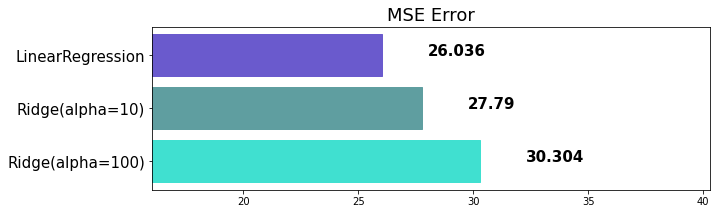

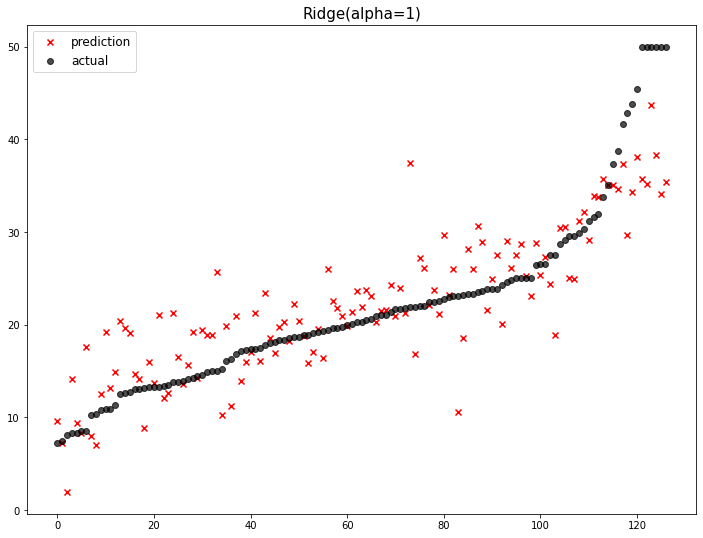

              model        mse
0  Ridge(alpha=100)  30.304403
1   Ridge(alpha=10)  27.790175
2    Ridge(alpha=1)  26.653101
3  LinearRegression  26.035559


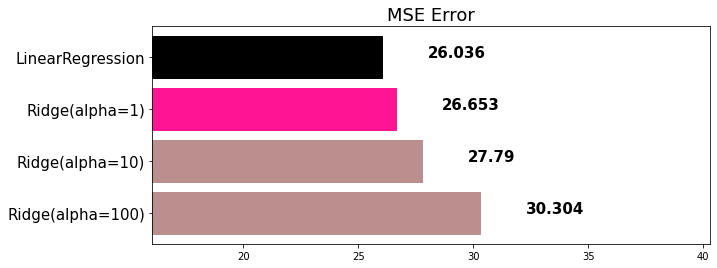

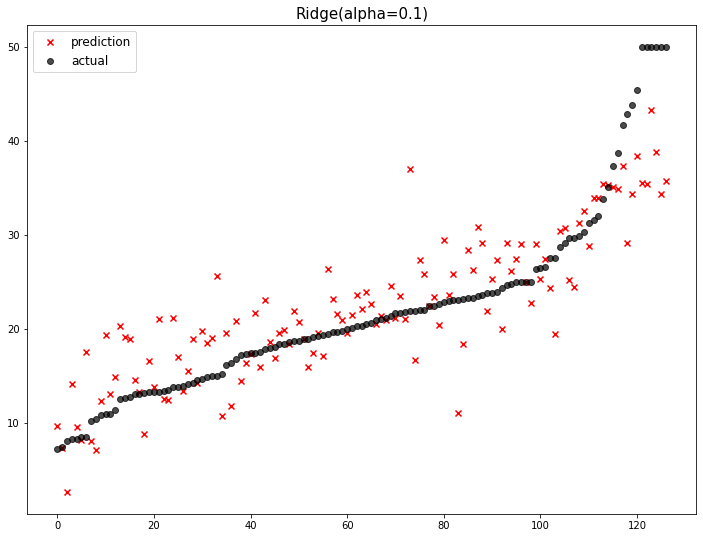

              model        mse
0  Ridge(alpha=100)  30.304403
1   Ridge(alpha=10)  27.790175
2    Ridge(alpha=1)  26.653101
3  Ridge(alpha=0.1)  26.118543
4  LinearRegression  26.035559


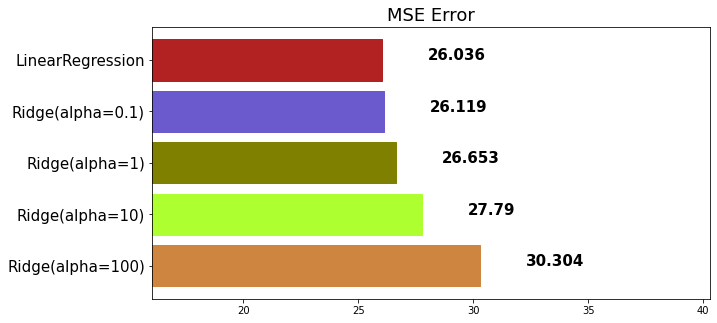

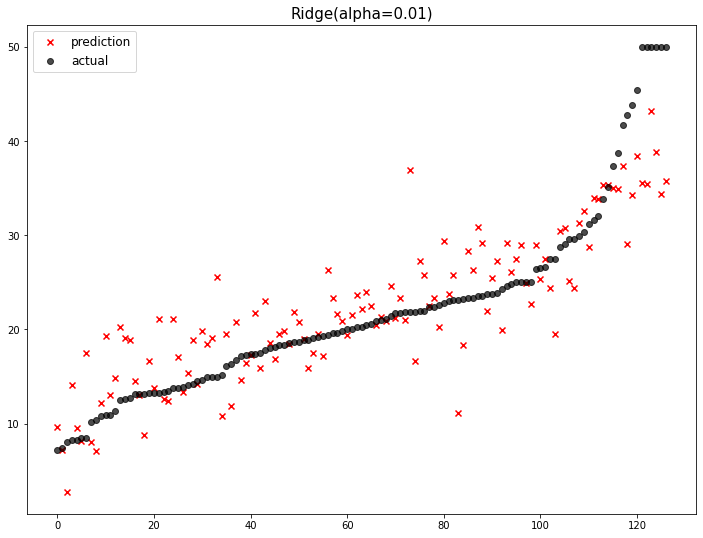

               model        mse
0   Ridge(alpha=100)  30.304403
1    Ridge(alpha=10)  27.790175
2     Ridge(alpha=1)  26.653101
3   Ridge(alpha=0.1)  26.118543
4  Ridge(alpha=0.01)  26.044075
5   LinearRegression  26.035559


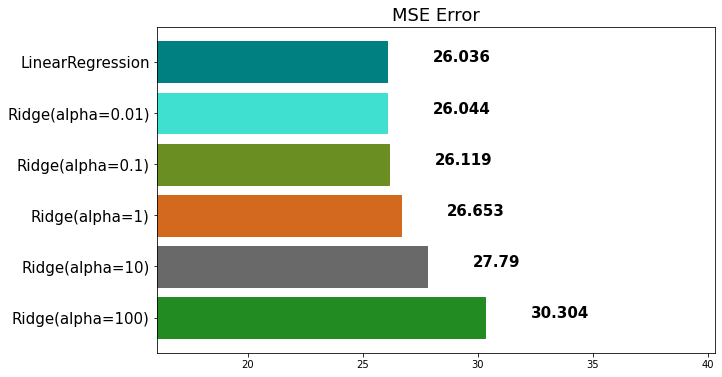

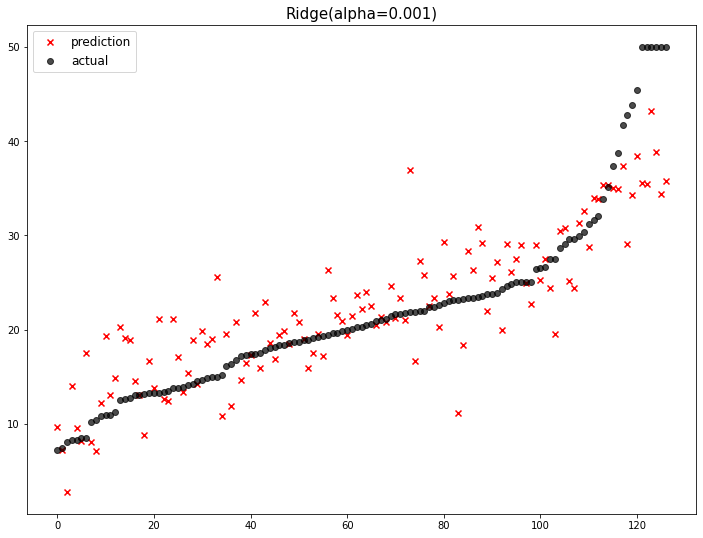

                model        mse
0    Ridge(alpha=100)  30.304403
1     Ridge(alpha=10)  27.790175
2      Ridge(alpha=1)  26.653101
3    Ridge(alpha=0.1)  26.118543
4   Ridge(alpha=0.01)  26.044075
5  Ridge(alpha=0.001)  26.036413
6    LinearRegression  26.035559


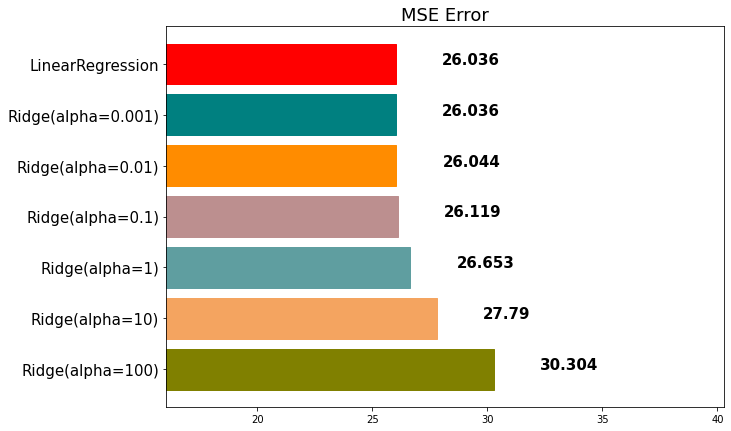

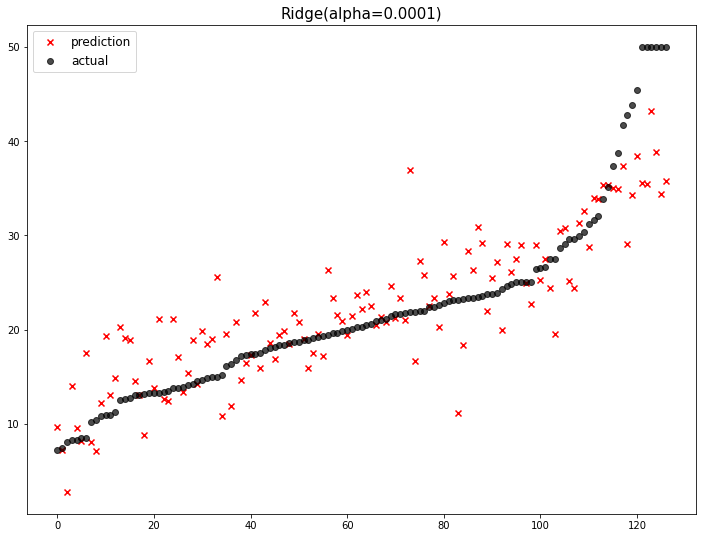

                 model        mse
0     Ridge(alpha=100)  30.304403
1      Ridge(alpha=10)  27.790175
2       Ridge(alpha=1)  26.653101
3     Ridge(alpha=0.1)  26.118543
4    Ridge(alpha=0.01)  26.044075
5   Ridge(alpha=0.001)  26.036413
6  Ridge(alpha=0.0001)  26.035644
7     LinearRegression  26.035559


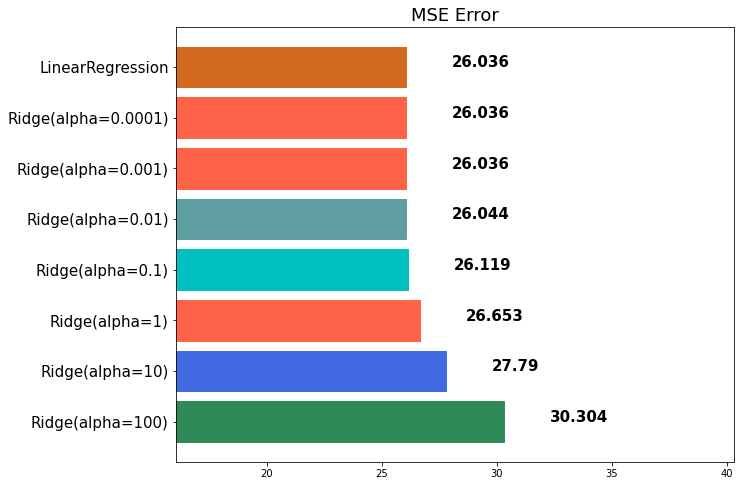

In [32]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [33]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [34]:
ridge.coef_

array([ -0.12300271,   0.06223576,  -0.02382231,   2.32836526,
       -15.1305328 ,   3.49031218,  -0.00069423,  -1.56893094,
         0.3859142 ,  -0.0148097 ,  -0.91227508,   0.01317914,
        -0.49426491])

In [35]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

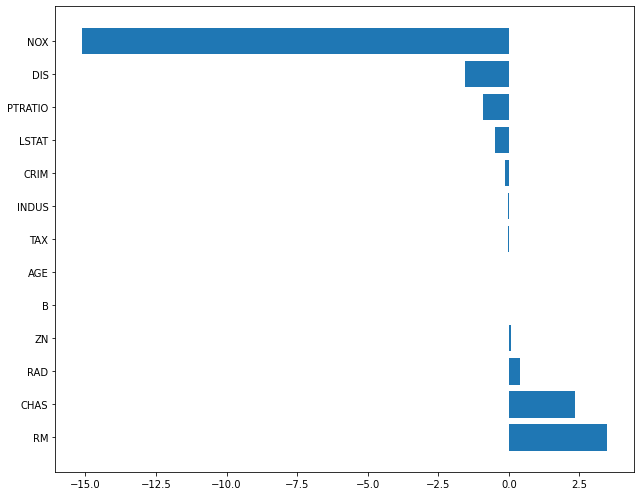

In [36]:
plot_coef(x_train.columns, ridge.coef_)

alpha 값에 따른 coef 의 차이를 확인해 봅시다

In [37]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

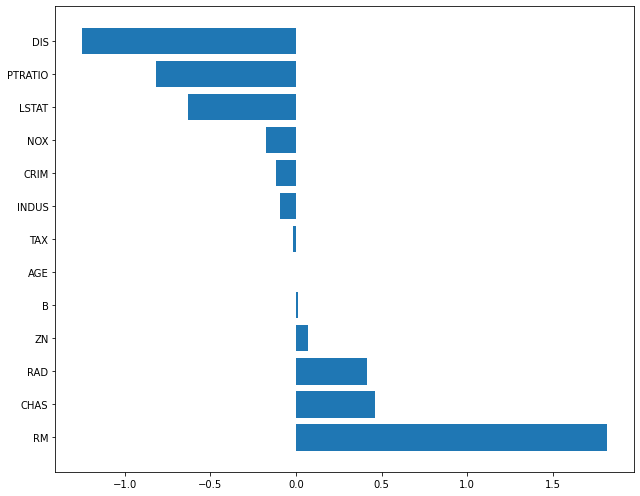

In [38]:
plot_coef(x_train.columns, ridge_100.coef_)

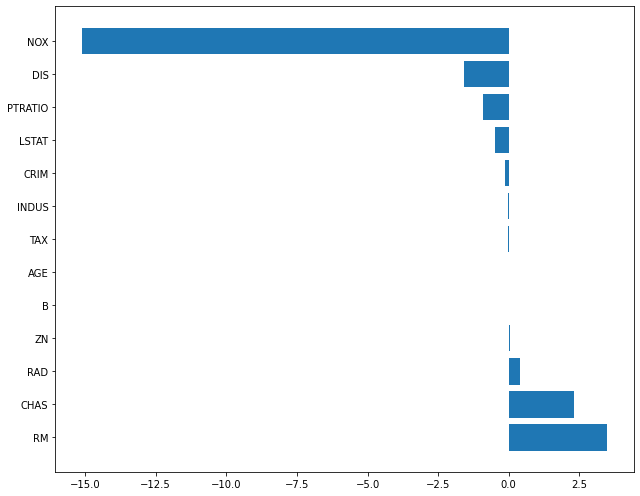

In [39]:
plot_coef(x_train.columns, ridge_001.coef_)

In [40]:
from sklearn.linear_model import Lasso

In [41]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

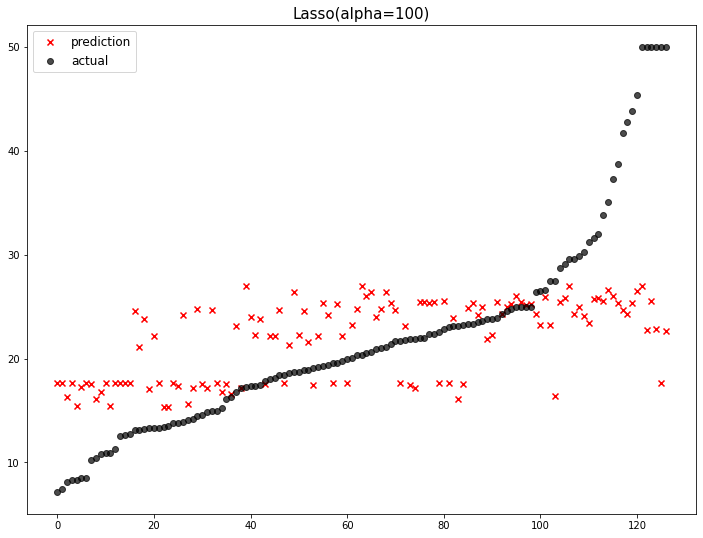

                 model        mse
0     Lasso(alpha=100)  73.213009
1     Ridge(alpha=100)  30.304403
2      Ridge(alpha=10)  27.790175
3       Ridge(alpha=1)  26.653101
4     Ridge(alpha=0.1)  26.118543
5    Ridge(alpha=0.01)  26.044075
6   Ridge(alpha=0.001)  26.036413
7  Ridge(alpha=0.0001)  26.035644
8     LinearRegression  26.035559


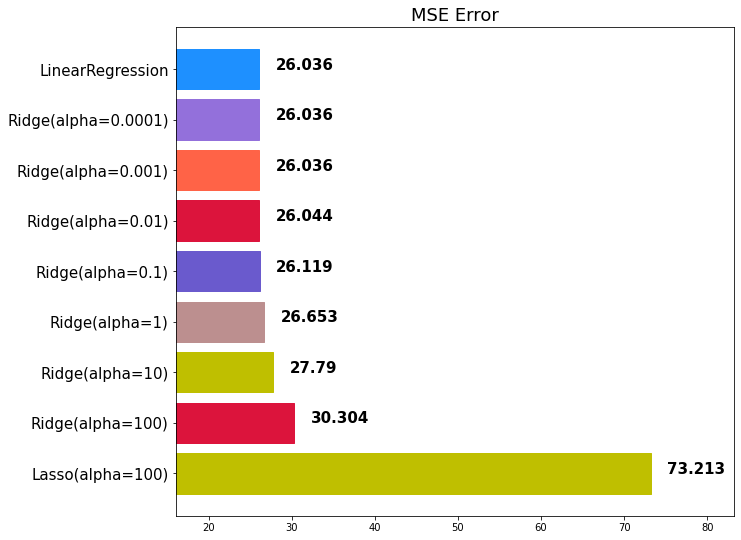

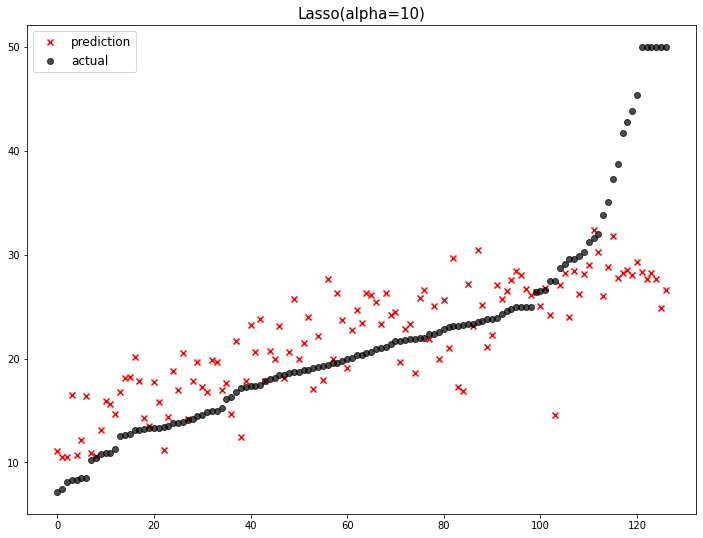

                 model        mse
0     Lasso(alpha=100)  73.213009
1      Lasso(alpha=10)  47.273660
2     Ridge(alpha=100)  30.304403
3      Ridge(alpha=10)  27.790175
4       Ridge(alpha=1)  26.653101
5     Ridge(alpha=0.1)  26.118543
6    Ridge(alpha=0.01)  26.044075
7   Ridge(alpha=0.001)  26.036413
8  Ridge(alpha=0.0001)  26.035644
9     LinearRegression  26.035559


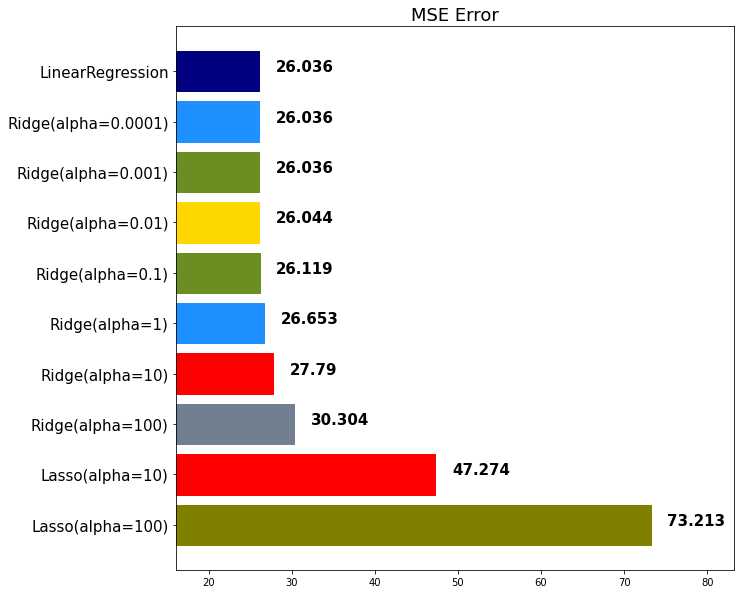

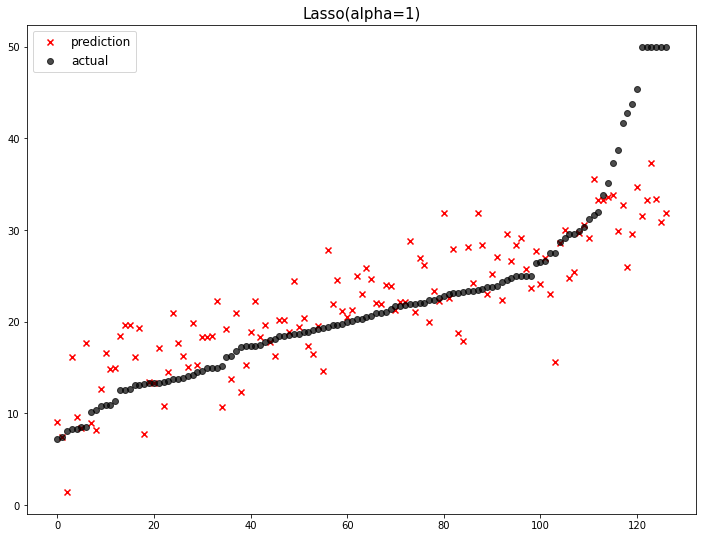

                  model        mse
0      Lasso(alpha=100)  73.213009
1       Lasso(alpha=10)  47.273660
2        Lasso(alpha=1)  33.641228
3      Ridge(alpha=100)  30.304403
4       Ridge(alpha=10)  27.790175
5        Ridge(alpha=1)  26.653101
6      Ridge(alpha=0.1)  26.118543
7     Ridge(alpha=0.01)  26.044075
8    Ridge(alpha=0.001)  26.036413
9   Ridge(alpha=0.0001)  26.035644
10     LinearRegression  26.035559


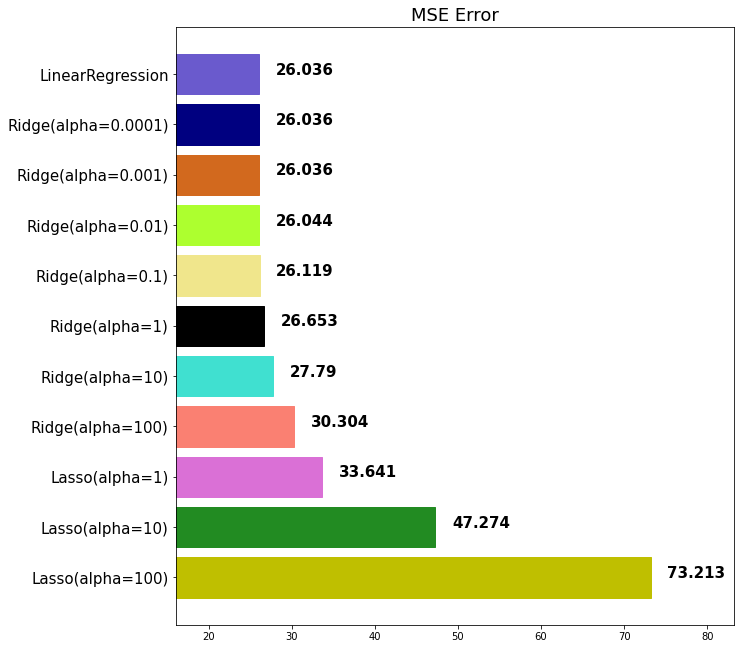

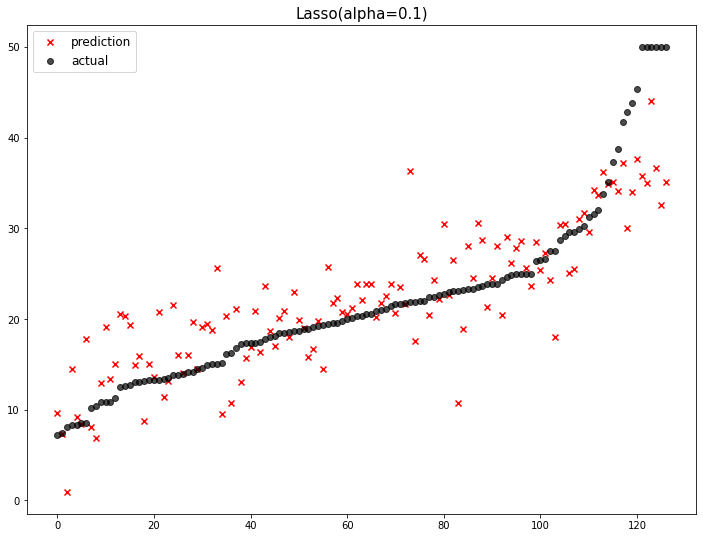

                  model        mse
0      Lasso(alpha=100)  73.213009
1       Lasso(alpha=10)  47.273660
2        Lasso(alpha=1)  33.641228
3      Ridge(alpha=100)  30.304403
4      Lasso(alpha=0.1)  28.140697
5       Ridge(alpha=10)  27.790175
6        Ridge(alpha=1)  26.653101
7      Ridge(alpha=0.1)  26.118543
8     Ridge(alpha=0.01)  26.044075
9    Ridge(alpha=0.001)  26.036413
10  Ridge(alpha=0.0001)  26.035644
11     LinearRegression  26.035559


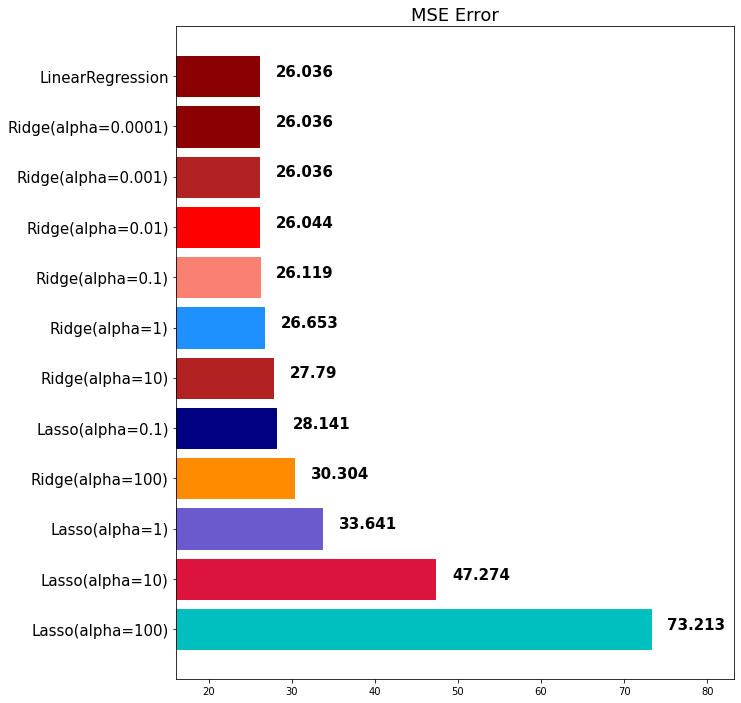

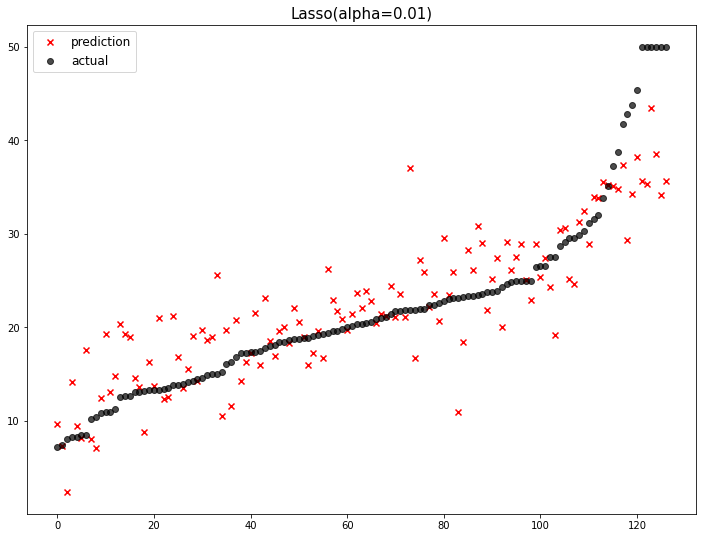

                  model        mse
0      Lasso(alpha=100)  73.213009
1       Lasso(alpha=10)  47.273660
2        Lasso(alpha=1)  33.641228
3      Ridge(alpha=100)  30.304403
4      Lasso(alpha=0.1)  28.140697
5       Ridge(alpha=10)  27.790175
6        Ridge(alpha=1)  26.653101
7     Lasso(alpha=0.01)  26.309452
8      Ridge(alpha=0.1)  26.118543
9     Ridge(alpha=0.01)  26.044075
10   Ridge(alpha=0.001)  26.036413
11  Ridge(alpha=0.0001)  26.035644
12     LinearRegression  26.035559


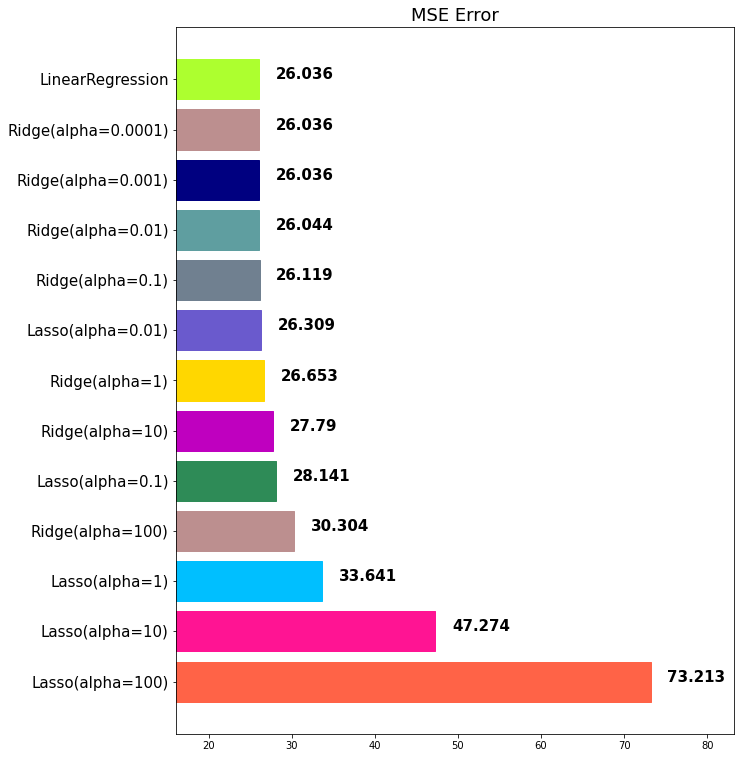

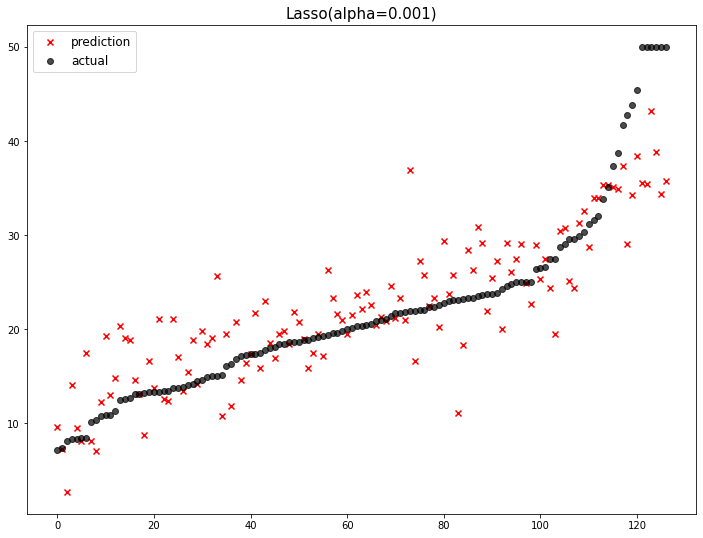

                  model        mse
0      Lasso(alpha=100)  73.213009
1       Lasso(alpha=10)  47.273660
2        Lasso(alpha=1)  33.641228
3      Ridge(alpha=100)  30.304403
4      Lasso(alpha=0.1)  28.140697
5       Ridge(alpha=10)  27.790175
6        Ridge(alpha=1)  26.653101
7     Lasso(alpha=0.01)  26.309452
8      Ridge(alpha=0.1)  26.118543
9    Lasso(alpha=0.001)  26.060242
10    Ridge(alpha=0.01)  26.044075
11   Ridge(alpha=0.001)  26.036413
12  Ridge(alpha=0.0001)  26.035644
13     LinearRegression  26.035559


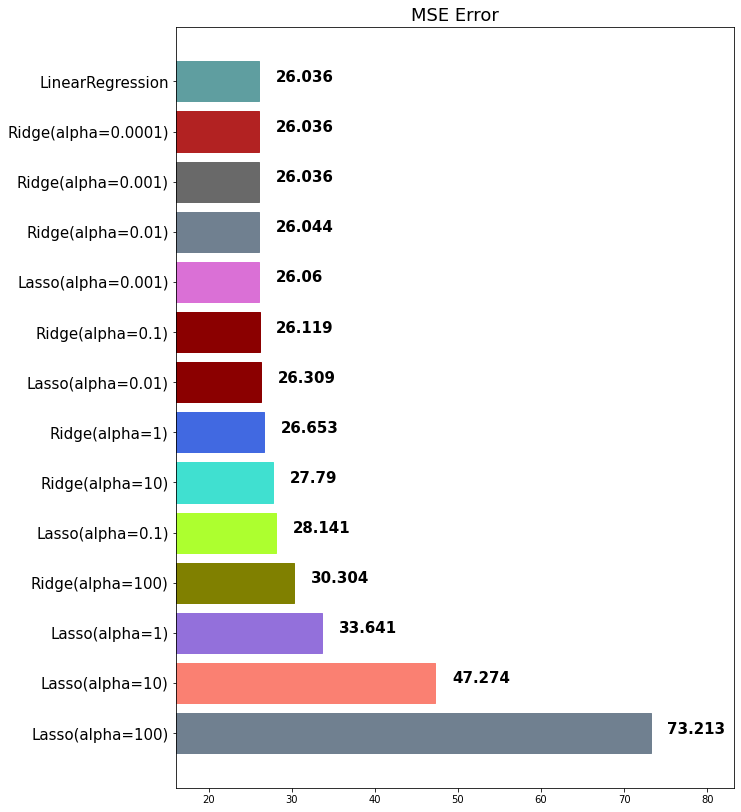

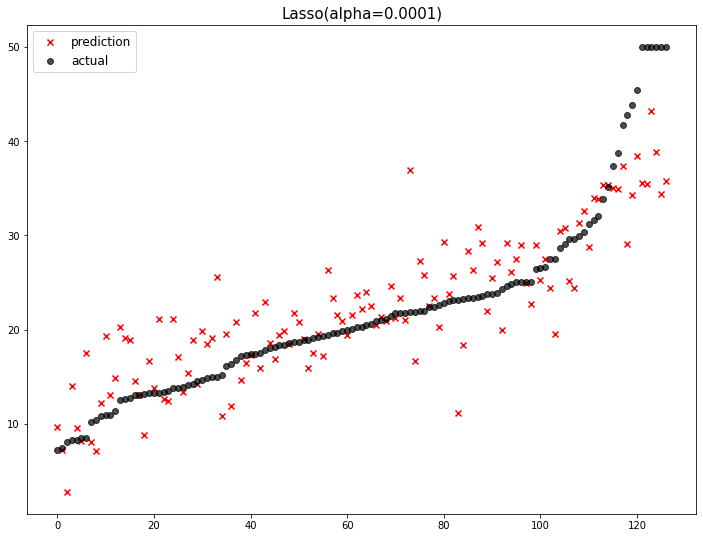

                  model        mse
0      Lasso(alpha=100)  73.213009
1       Lasso(alpha=10)  47.273660
2        Lasso(alpha=1)  33.641228
3      Ridge(alpha=100)  30.304403
4      Lasso(alpha=0.1)  28.140697
5       Ridge(alpha=10)  27.790175
6        Ridge(alpha=1)  26.653101
7     Lasso(alpha=0.01)  26.309452
8      Ridge(alpha=0.1)  26.118543
9    Lasso(alpha=0.001)  26.060242
10    Ridge(alpha=0.01)  26.044075
11  Lasso(alpha=0.0001)  26.038000
12   Ridge(alpha=0.001)  26.036413
13  Ridge(alpha=0.0001)  26.035644
14     LinearRegression  26.035559


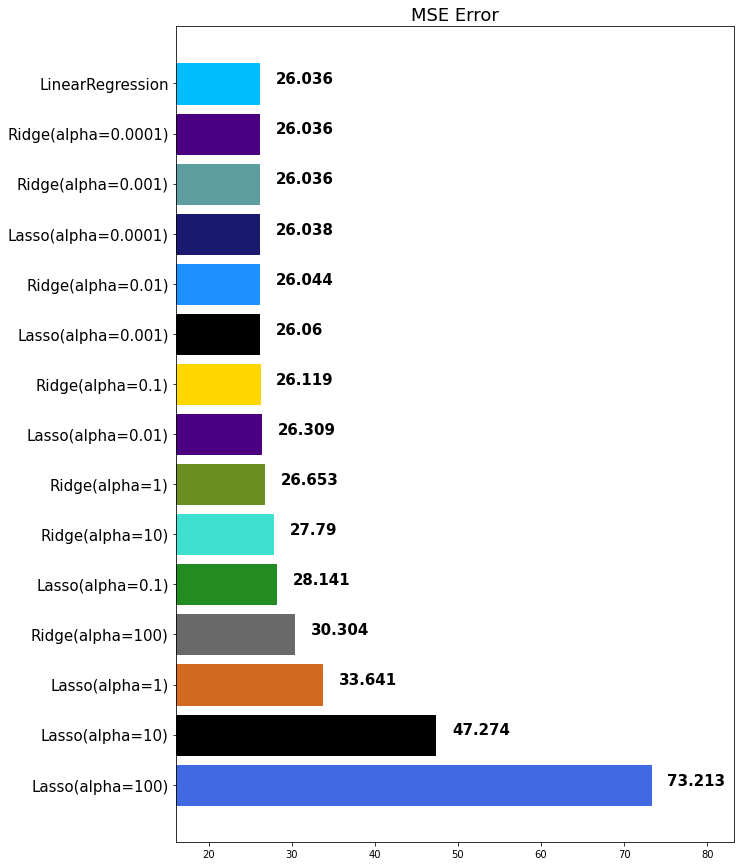

In [42]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [43]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

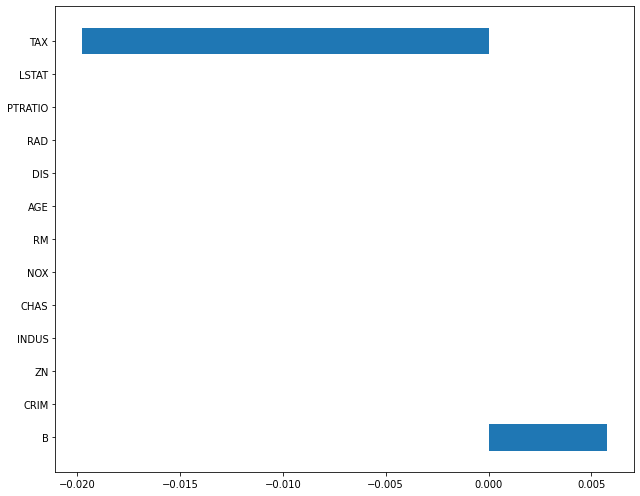

In [44]:
plot_coef(x_train.columns, lasso_100.coef_)

In [45]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01978082,
       -0.        ,  0.00577678, -0.        ])

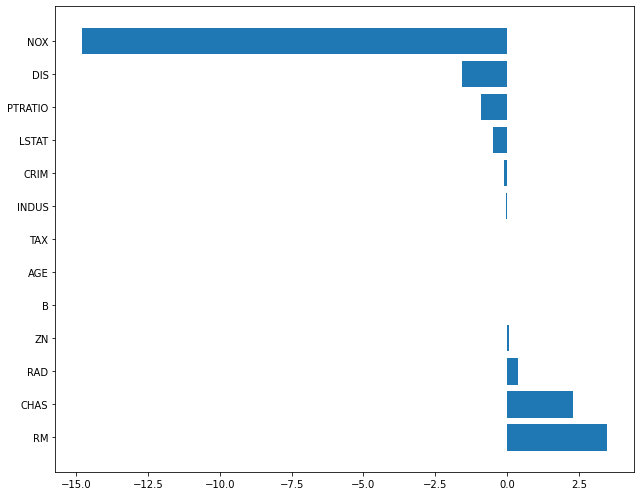

In [46]:
plot_coef(x_train.columns, lasso_001.coef_)

In [47]:
lasso_001.coef_

array([ -0.12284795,   0.06226957,  -0.02509062,   2.31055158,
       -14.81016231,   3.49208501,  -0.00094535,  -1.56366799,
         0.38548369,  -0.01485204,  -0.90839587,   0.01319828,
        -0.49483356])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
ratios = [0.2, 0.5, 0.8]

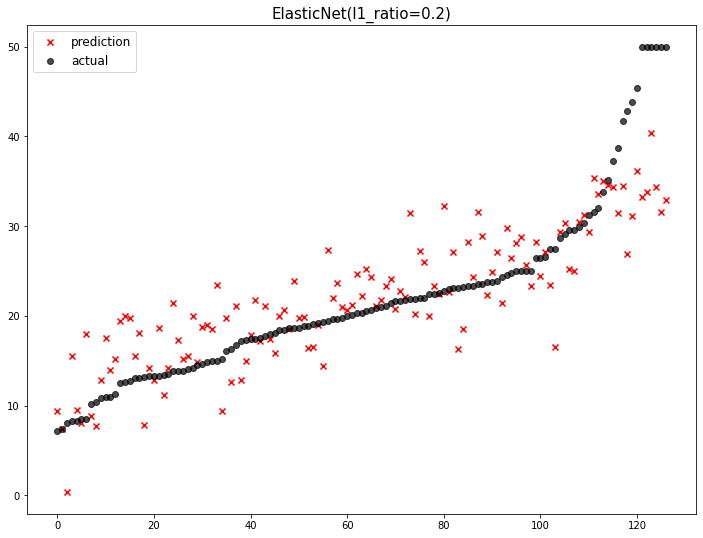

                       model        mse
0           Lasso(alpha=100)  73.213009
1            Lasso(alpha=10)  47.273660
2             Lasso(alpha=1)  33.641228
3   ElasticNet(l1_ratio=0.2)  31.358083
4           Ridge(alpha=100)  30.304403
5           Lasso(alpha=0.1)  28.140697
6            Ridge(alpha=10)  27.790175
7             Ridge(alpha=1)  26.653101
8          Lasso(alpha=0.01)  26.309452
9           Ridge(alpha=0.1)  26.118543
10        Lasso(alpha=0.001)  26.060242
11         Ridge(alpha=0.01)  26.044075
12       Lasso(alpha=0.0001)  26.038000
13        Ridge(alpha=0.001)  26.036413
14       Ridge(alpha=0.0001)  26.035644
15          LinearRegression  26.035559


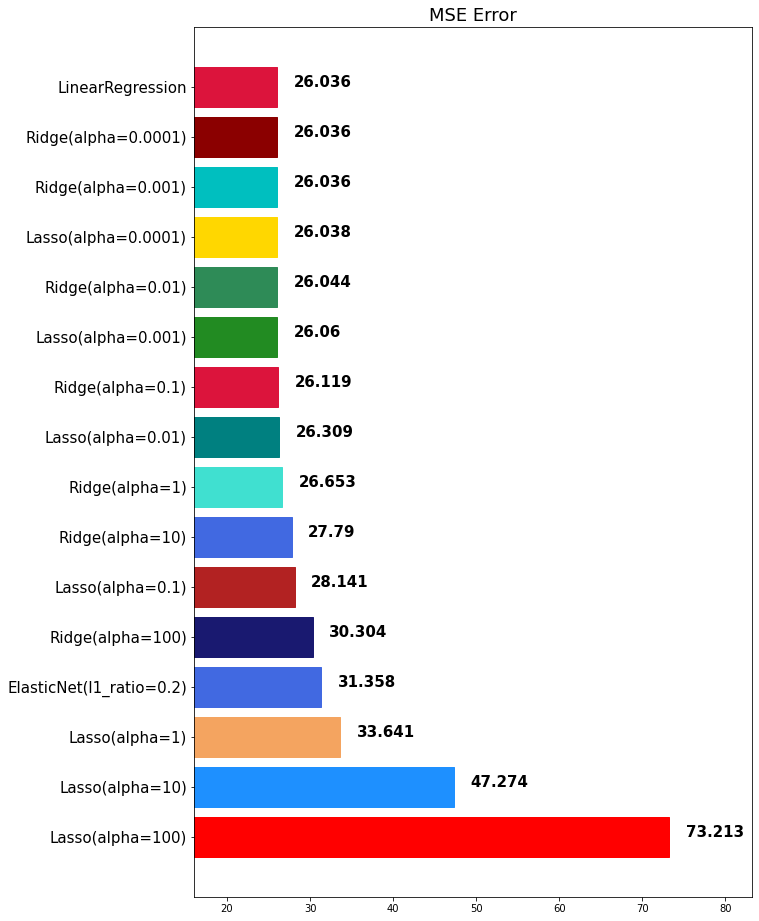

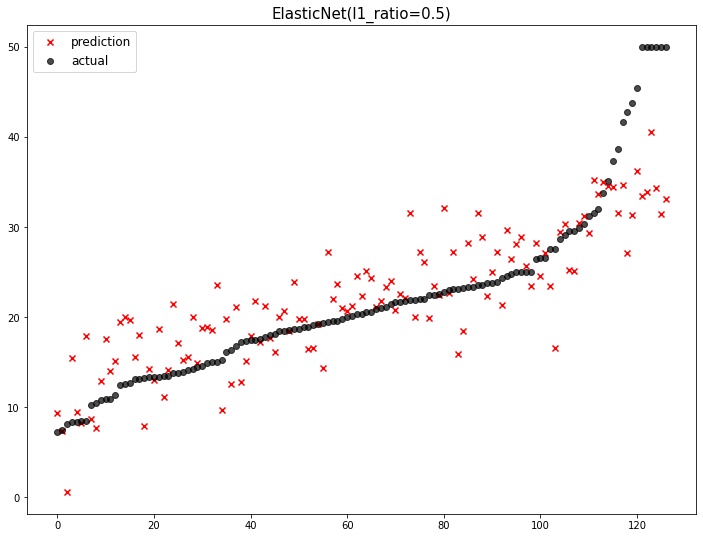

                       model        mse
0           Lasso(alpha=100)  73.213009
1            Lasso(alpha=10)  47.273660
2             Lasso(alpha=1)  33.641228
3   ElasticNet(l1_ratio=0.2)  31.358083
4   ElasticNet(l1_ratio=0.5)  31.044454
5           Ridge(alpha=100)  30.304403
6           Lasso(alpha=0.1)  28.140697
7            Ridge(alpha=10)  27.790175
8             Ridge(alpha=1)  26.653101
9          Lasso(alpha=0.01)  26.309452
10          Ridge(alpha=0.1)  26.118543
11        Lasso(alpha=0.001)  26.060242
12         Ridge(alpha=0.01)  26.044075
13       Lasso(alpha=0.0001)  26.038000
14        Ridge(alpha=0.001)  26.036413
15       Ridge(alpha=0.0001)  26.035644
16          LinearRegression  26.035559


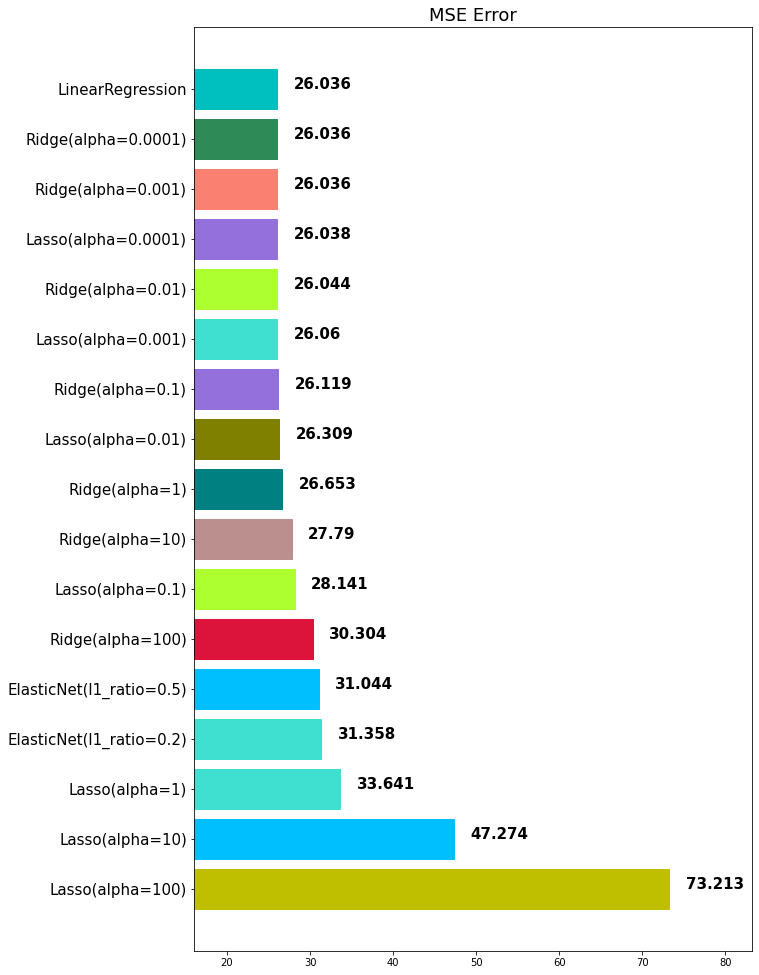

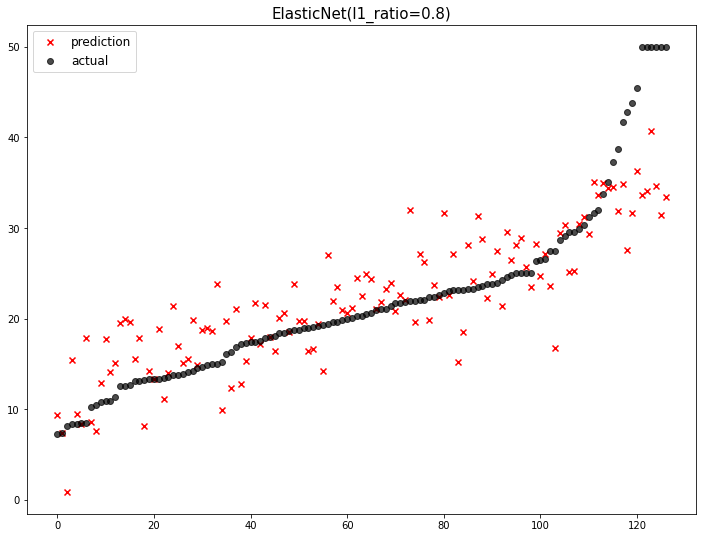

                       model        mse
0           Lasso(alpha=100)  73.213009
1            Lasso(alpha=10)  47.273660
2             Lasso(alpha=1)  33.641228
3   ElasticNet(l1_ratio=0.2)  31.358083
4   ElasticNet(l1_ratio=0.5)  31.044454
5   ElasticNet(l1_ratio=0.8)  30.456453
6           Ridge(alpha=100)  30.304403
7           Lasso(alpha=0.1)  28.140697
8            Ridge(alpha=10)  27.790175
9             Ridge(alpha=1)  26.653101
10         Lasso(alpha=0.01)  26.309452
11          Ridge(alpha=0.1)  26.118543
12        Lasso(alpha=0.001)  26.060242
13         Ridge(alpha=0.01)  26.044075
14       Lasso(alpha=0.0001)  26.038000
15        Ridge(alpha=0.001)  26.036413
16       Ridge(alpha=0.0001)  26.035644
17          LinearRegression  26.035559


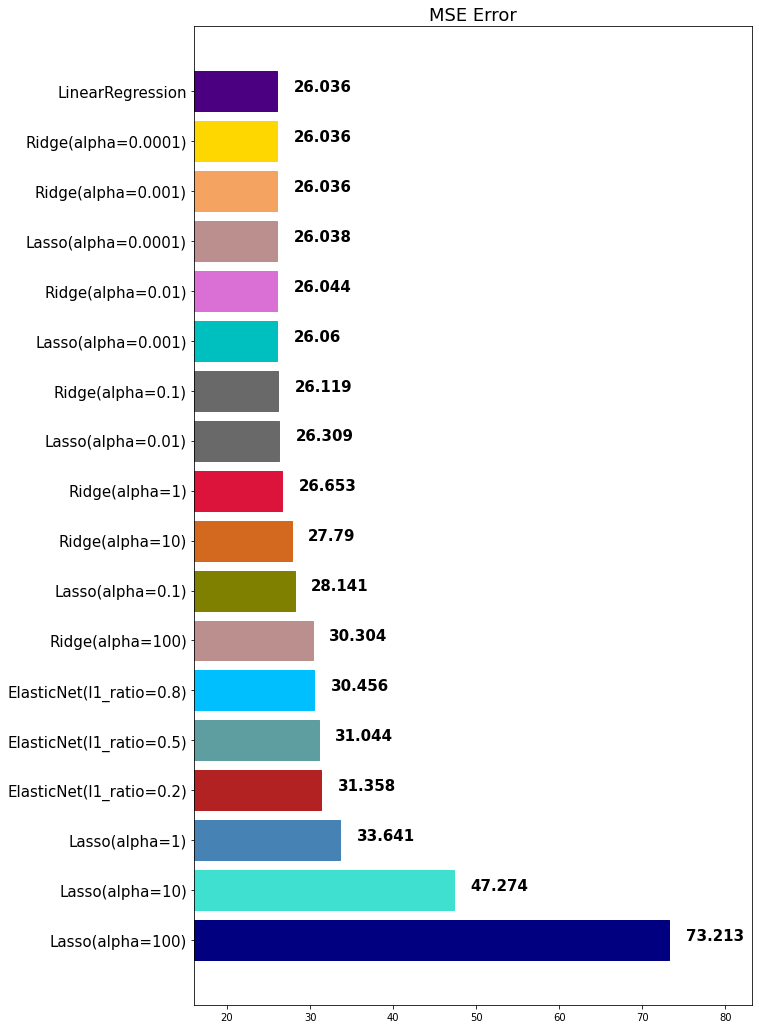

In [50]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [51]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)


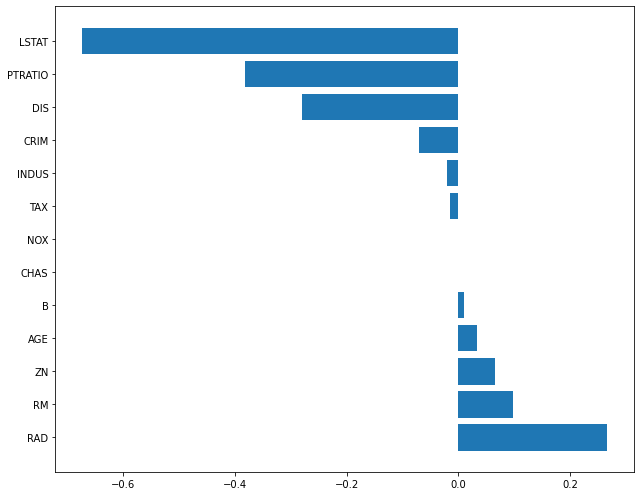

In [52]:
plot_coef(x_train.columns, elsticnet_20.coef_)

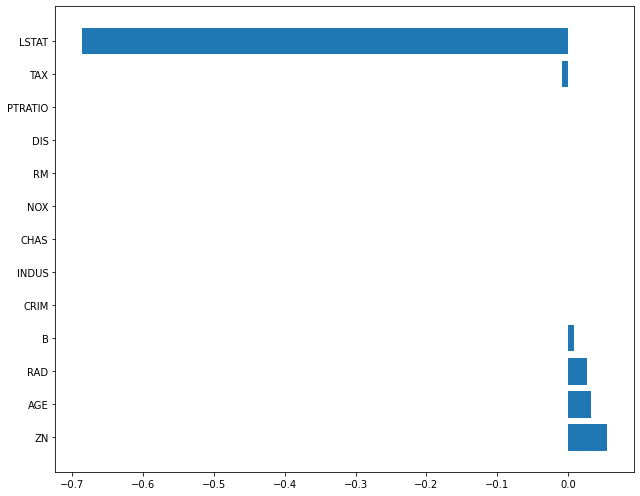

In [53]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [54]:
elsticnet_80.coef_

array([-0.        ,  0.05518968, -0.        ,  0.        ,  0.        ,
        0.        ,  0.03227414, -0.        ,  0.0272111 , -0.0085839 ,
       -0.        ,  0.00805969, -0.68625061])

## Scaler

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [56]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.392695,12.163588,10.791847,0.073879,0.550314,6.275654,67.008971,3.907224,9.060686,397.934037,18.341689,357.737573,12.471082
std,8.933101,24.103275,6.796782,0.261919,0.118395,0.677897,28.626720,2.132073,8.415720,163.859190,2.160982,90.937384,7.139907
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.980000
25%,0.081065,0.000000,5.130000,0.000000,0.448000,5.882000,42.350000,2.136350,4.000000,279.000000,17.000000,376.075000,6.885000
50%,0.241030,0.000000,8.560000,0.000000,0.524000,6.209000,74.500000,3.377900,5.000000,315.000000,18.700000,391.000000,10.970000
75%,2.542505,20.000000,18.100000,0.000000,0.624000,6.622000,93.350000,5.287300,8.000000,437.000000,20.200000,395.850000,16.295000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [57]:
std_scaler = StandardScaler()

In [58]:
std_scaled = std_scaler.fit_transform(x_train)

In [59]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.38,-0.51,-1.52,-0.28,-1.40,-4.01,-2.24,-1.30,-0.96,-1.29,-2.66,-3.94,-1.47
25%,-0.37,-0.51,-0.83,-0.28,-0.87,-0.58,-0.86,-0.83,-0.60,-0.73,-0.62,0.20,-0.78
50%,-0.35,-0.51,-0.33,-0.28,-0.22,-0.10,0.26,-0.25,-0.48,-0.51,0.17,0.37,-0.21
75%,-0.10,0.33,1.08,-0.28,0.62,0.51,0.92,0.65,-0.13,0.24,0.86,0.42,0.54
max,9.59,3.44,2.50,3.54,2.71,3.62,1.15,3.86,1.78,1.91,1.70,0.43,3.58


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [60]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [61]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.13,0.38,0.07,0.34,0.53,0.66,0.25,0.35,0.40,0.61,0.90,0.29
std,0.10,0.25,0.25,0.26,0.24,0.13,0.29,0.19,0.37,0.31,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.41,0.09,0.13,0.18,0.47,0.95,0.14
50%,0.00,0.00,0.30,0.00,0.29,0.51,0.74,0.20,0.17,0.24,0.65,0.99,0.25
75%,0.03,0.21,0.65,0.00,0.49,0.59,0.93,0.38,0.30,0.48,0.81,1.00,0.40
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [62]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [63]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [64]:
from sklearn.pipeline import make_pipeline

In [76]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    #MinMaxScaler(),
    #RobustScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [77]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

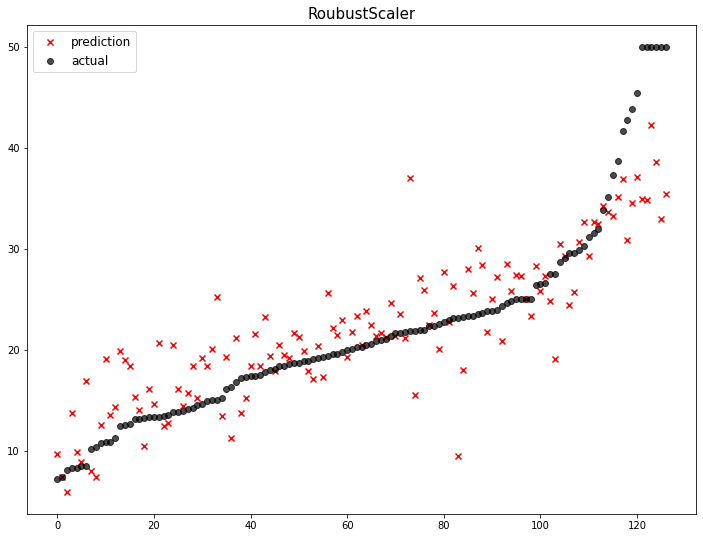

                       model        mse
0           Lasso(alpha=100)  73.213009
1        Standard ElasticNet  48.892299
2            Lasso(alpha=10)  47.273660
3             Lasso(alpha=1)  33.641228
4   ElasticNet(l1_ratio=0.2)  31.358083
5   ElasticNet(l1_ratio=0.5)  31.044454
6   ElasticNet(l1_ratio=0.8)  30.456453
7           Ridge(alpha=100)  30.304403
8           Lasso(alpha=0.1)  28.140697
9            Ridge(alpha=10)  27.790175
10            Ridge(alpha=1)  26.653101
11         Lasso(alpha=0.01)  26.309452
12          Ridge(alpha=0.1)  26.118543
13        Lasso(alpha=0.001)  26.060242
14         Ridge(alpha=0.01)  26.044075
15       Lasso(alpha=0.0001)  26.038000
16        Ridge(alpha=0.001)  26.036413
17       Ridge(alpha=0.0001)  26.035644
18          LinearRegression  26.035559
19    No Standard ElasticNet  25.741757
20             RoubustScaler  25.741757


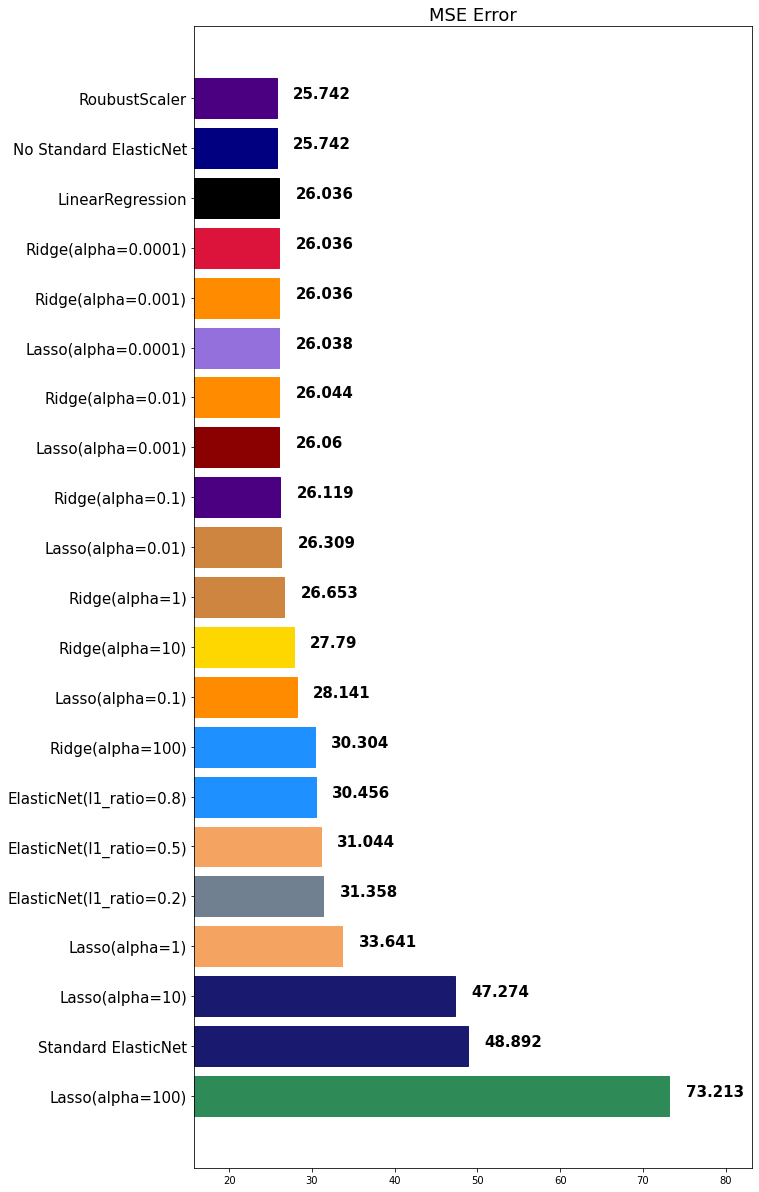

In [78]:
mse_eval('RoubustScaler', elasticnet_pred, y_test)

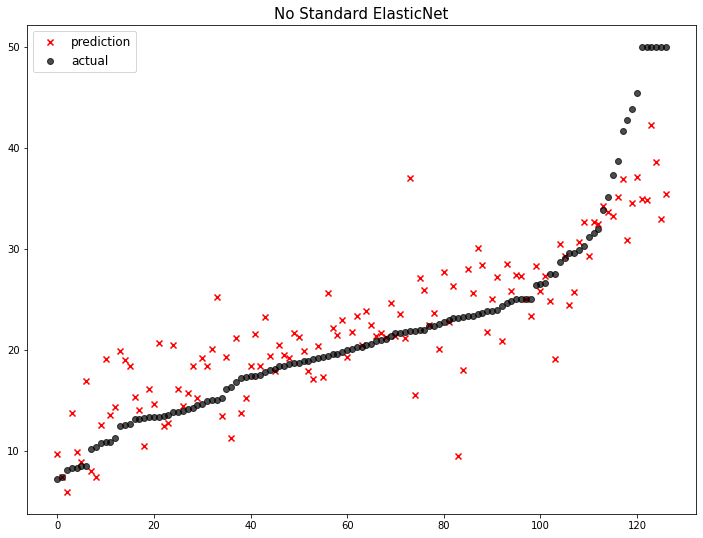

                       model        mse
0           Lasso(alpha=100)  73.213009
1            Lasso(alpha=10)  47.273660
2             Lasso(alpha=1)  33.641228
3   ElasticNet(l1_ratio=0.2)  31.358083
4   ElasticNet(l1_ratio=0.5)  31.044454
5   ElasticNet(l1_ratio=0.8)  30.456453
6           Ridge(alpha=100)  30.304403
7           Lasso(alpha=0.1)  28.140697
8            Ridge(alpha=10)  27.790175
9             Ridge(alpha=1)  26.653101
10         Lasso(alpha=0.01)  26.309452
11          Ridge(alpha=0.1)  26.118543
12        Lasso(alpha=0.001)  26.060242
13         Ridge(alpha=0.01)  26.044075
14       Lasso(alpha=0.0001)  26.038000
15        Ridge(alpha=0.001)  26.036413
16       Ridge(alpha=0.0001)  26.035644
17          LinearRegression  26.035559
18       Standard ElasticNet  25.741757
19    No Standard ElasticNet  25.741757


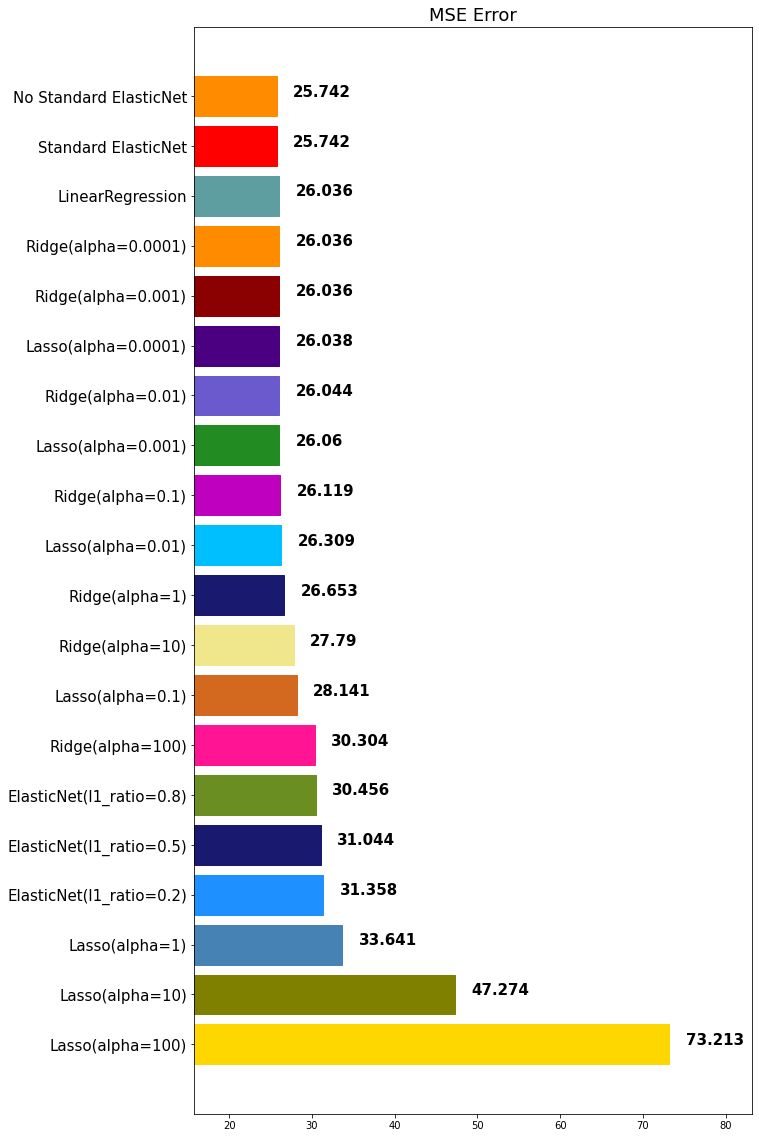

In [69]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [81]:
poly_features = poly.fit_transform(x_train)[0]

In [82]:
poly_features

array([     0.65665   ,     20.        ,      3.97      ,      0.        ,
            0.647     ,      6.842     ,    100.        ,      2.0107    ,
            5.        ,    264.        ,     13.        ,    391.93      ,
            6.9       ,      0.43118922,     13.133     ,      2.6069005 ,
            0.        ,      0.42485255,      4.4927993 ,     65.665     ,
            1.32032615,      3.28325   ,    173.3556    ,      8.53645   ,
          257.3608345 ,      4.530885  ,    400.        ,     79.4       ,
            0.        ,     12.94      ,    136.84      ,   2000.        ,
           40.214     ,    100.        ,   5280.        ,    260.        ,
         7838.6       ,    138.        ,     15.7609    ,      0.        ,
            2.56859   ,     27.16274   ,    397.        ,      7.982479  ,
           19.85      ,   1048.08      ,     51.61      ,   1555.9621    ,
           27.393     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [83]:
x_train.iloc[0]

CRIM         0.65665
ZN          20.00000
INDUS        3.97000
CHAS         0.00000
NOX          0.64700
RM           6.84200
AGE        100.00000
DIS          2.01070
RAD          5.00000
TAX        264.00000
PTRATIO     13.00000
B          391.93000
LSTAT        6.90000
Name: 259, dtype: float64

In [84]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [85]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.566195355771924, tolerance: 3.043892728232191
  positive)


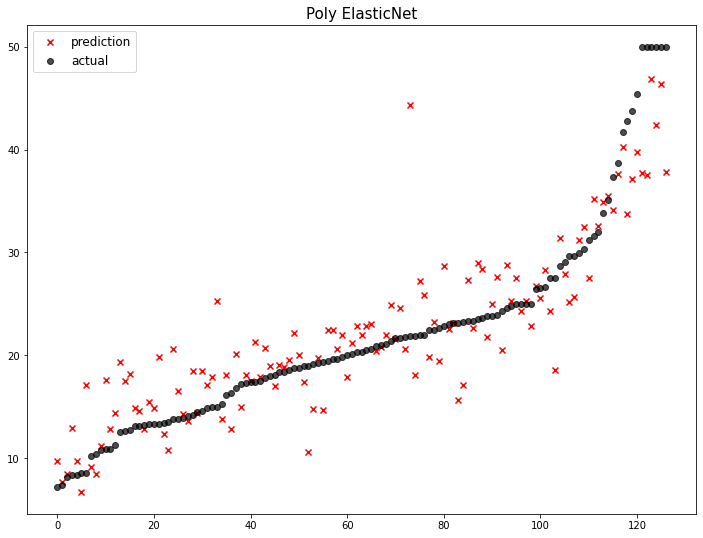

                       model        mse
0           Lasso(alpha=100)  73.213009
1        Standard ElasticNet  48.892299
2            Lasso(alpha=10)  47.273660
3             Lasso(alpha=1)  33.641228
4   ElasticNet(l1_ratio=0.2)  31.358083
5   ElasticNet(l1_ratio=0.5)  31.044454
6   ElasticNet(l1_ratio=0.8)  30.456453
7           Ridge(alpha=100)  30.304403
8           Lasso(alpha=0.1)  28.140697
9            Ridge(alpha=10)  27.790175
10            Ridge(alpha=1)  26.653101
11         Lasso(alpha=0.01)  26.309452
12          Ridge(alpha=0.1)  26.118543
13        Lasso(alpha=0.001)  26.060242
14         Ridge(alpha=0.01)  26.044075
15       Lasso(alpha=0.0001)  26.038000
16        Ridge(alpha=0.001)  26.036413
17       Ridge(alpha=0.0001)  26.035644
18          LinearRegression  26.035559
19    No Standard ElasticNet  25.741757
20             RoubustScaler  25.741757
21           Poly ElasticNet  19.788357


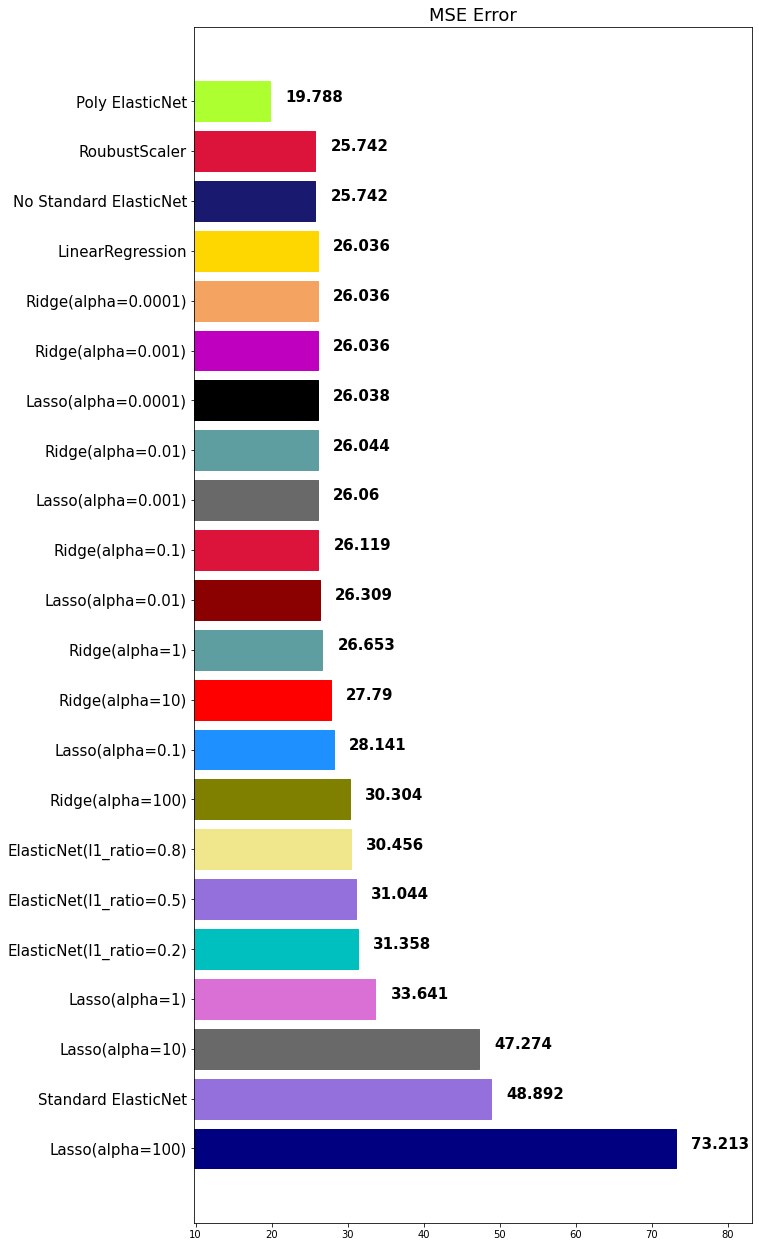

In [86]:
mse_eval('Poly ElasticNet', poly_pred, y_test)